In [1]:
import sys
import socket
import os

if socket.gethostname() == "qiaubuntu" or socket.gethostname() == "toologic-ubuntu2":
    sys.path.extend(['/home/jorg/repository/model_evaluation'])
else:
    sys.path.extend(['/home/jorg/repo/model_evaluation'])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np
import torch

%matplotlib inline
%load_ext autoreload
%autoreload 2
print("Ready")

Ready


In [2]:
from utils.detection.heat_map import ImageHeatMapHandler
from datasets.ACDC.get_data import load_data

def get_pat_data(src_data_path, patient_id, cardiac_phase, load_heat_maps=False,
                dt_config_id="fixed_46_31", mc_dropout=False):
    
    data_to_load = ["pred_labels", "dt_labels", "umaps", "ref_labels", "images"]
    data_dict = load_data(src_data_path, cardiac_phase, data_to_load,
                              mc_dropout=mc_dropout, dt_config_id=dt_config_id,
                              patient_id=patient_id, one_hot=False)
    data_handler = {d: data_dict[d][patient_id] for d in data_to_load}
    data_handler['voxel_spacing'] = data_dict['umaps'][patient_id]['spacing']
    data_handler.update({k: d_value for k, d_value in data_dict.items() if k not in data_handler.keys()})
    # Load heat maps
    if load_heat_maps:
        heat_map_dir = os.path.join(src_data_path, 'heat_maps')
        heat_map_handler = ImageHeatMapHandler(mode_dataset="separate")
        heat_map_handler.load_heat_map(heat_map_dir, patient_id, cardiac_phase, 
                                       mc_dropout=mc_dropout)
        data_handler['heat_map'] = heat_map_handler.heat_maps[patient_id][cardiac_phase]
    return data_handler

(10, 256, 192)


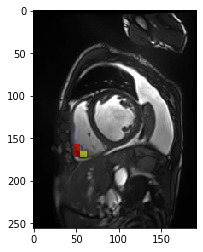

-8.599132e-08 0.8233128


In [12]:
umap = data_handler['umaps']['umap']
heat_map = data_handler['heat_map']

print(heat_map.shape)
u_slice = umap[0]
img_slice = data_handler['images'][3]
heat_map_slice = heat_map[3]

plt.imshow(img_slice, cmap=cm.gray)
plt.imshow(heat_map_slice, plt.get_cmap('jet') ) #, vmin=0., vmax=1.0)
plt.show()

print(np.min(umap), np.max(umap))

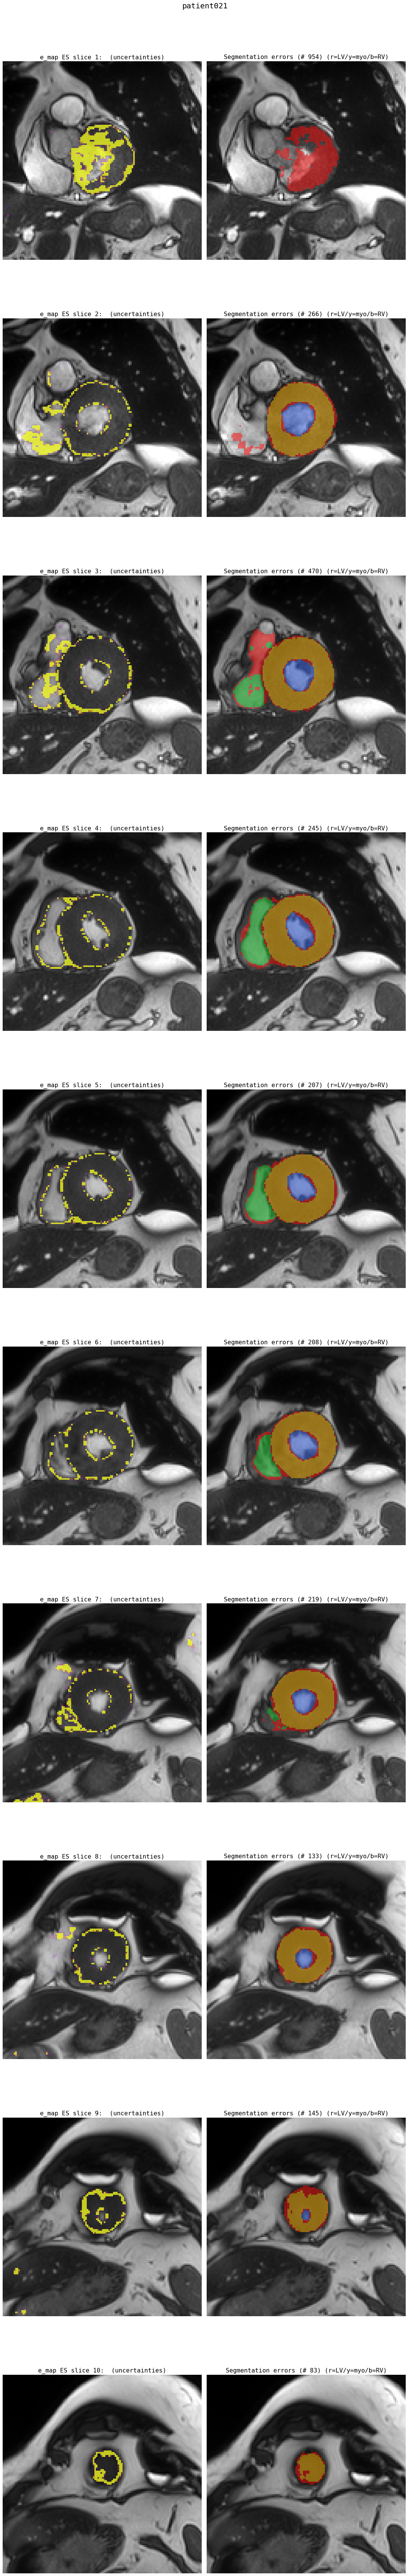

In [23]:
from plotting.visualize_seg_det_results import plot_slices_per_phase
"""
left_column_overlay
right_column_overlay: [None, "ref", "error", "auto", "heat_map", "umap", "error_roi"]

"""
src_data_path = os.path.expanduser("~/expers/acdc/dcnn_mc_dice/")
patient_id = "patient021"
cardiac_phase = "ES"
mc_dropout = False
type_of_map = "b_map" if mc_dropout else "e_map"
do_save = False
do_show = True
do_crop = True

data_handler = get_pat_data(src_data_path, patient_id, cardiac_phase, mc_dropout=mc_dropout,
                           load_heat_maps=True)
max_slices = data_handler['images'].shape[0]

plot_slices_per_phase(data_handler, patient_id, do_show=True, do_save=do_save, do_crop=do_crop,
                     left_column_overlay='umap', alpha=0.5, cardiac_phase=cardiac_phase,
                     slice_range=[0, max_slices], type_of_map=type_of_map, 
                     right_column_overlay="error")